**Завдання 1**
* Використовуючи дані з файлу 'student_scores.csv' побудуйте модель простої регресії для знаходження залежності між значеннями тривалості навчання і середнього балу студентів.
* Оцінити якість отриманої регресії.

In [143]:
import pandas as pd


# Read the data from the file.
df = pd.read_csv('student_scores.csv')


In [144]:
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Create Linear Regression:

In [145]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = df['Hours']
X_array = np.array(X).reshape(-1, 1)

y = df['Scores']
y_array = np.array(y).reshape(-1, 1)

# Train the algorithm.
LinReg = LinearRegression()
LinReg.fit(X_array, y_array)


LinearRegression()

### Visualisation Linear Regression:

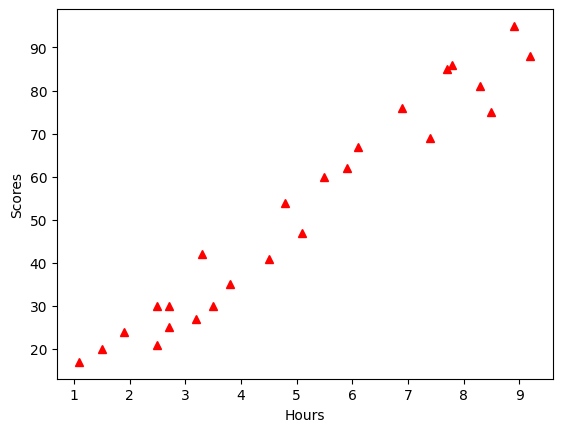

In [135]:
import matplotlib.pyplot as plt


plt.plot(X_array, y_array, 'r^')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


### Split the data into train and test sets:

In [146]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(20,)
(5,)
(20,)
(20,)


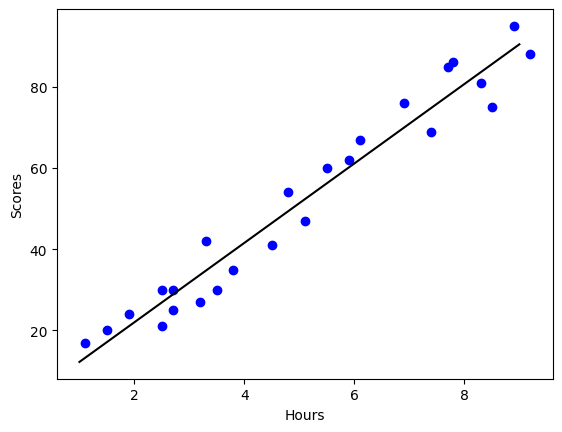

Retrieve the intercept: [2.48367341]
Retrieve the slope: [[9.77580339]]
Score of the current Linear Regression: 0.9529481969048356


In [147]:
b, m = LinReg.intercept_, LinReg.coef_
m = m[0]

plt.scatter(df.Hours, df.Scores, color='blue')
plt.plot(list(range(1, 10)), [m * x + b for x in range(1, 10)], color='black')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

print('Retrieve the intercept:', LinReg.intercept_)
print('Retrieve the slope:', LinReg.coef_)

print('Score of the current Linear Regression:', LinReg.score(X_array, y_array))


### Regression's quality assessment:

In [148]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


mae = mean_absolute_error(df.Hours, df.Scores)
print(f'Mean absolute error: {mae:.2f}')

mse = mean_squared_error(df.Hours, df.Scores)
print(f'Mean squared error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 46.47
Mean squared error: 2659.57
Root mean squared error: 51.57


**Завдання 2**
* Використовуючи дані з файлу 'petrol_consumption.csv' побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами.
* Оцінити якість отриманої регресії.

In [149]:
import pandas as pd

# Read the data from the file.
df = pd.read_csv('petrol_consumption.csv')


In [150]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


### Visualizing the relationships between features using pair plots:

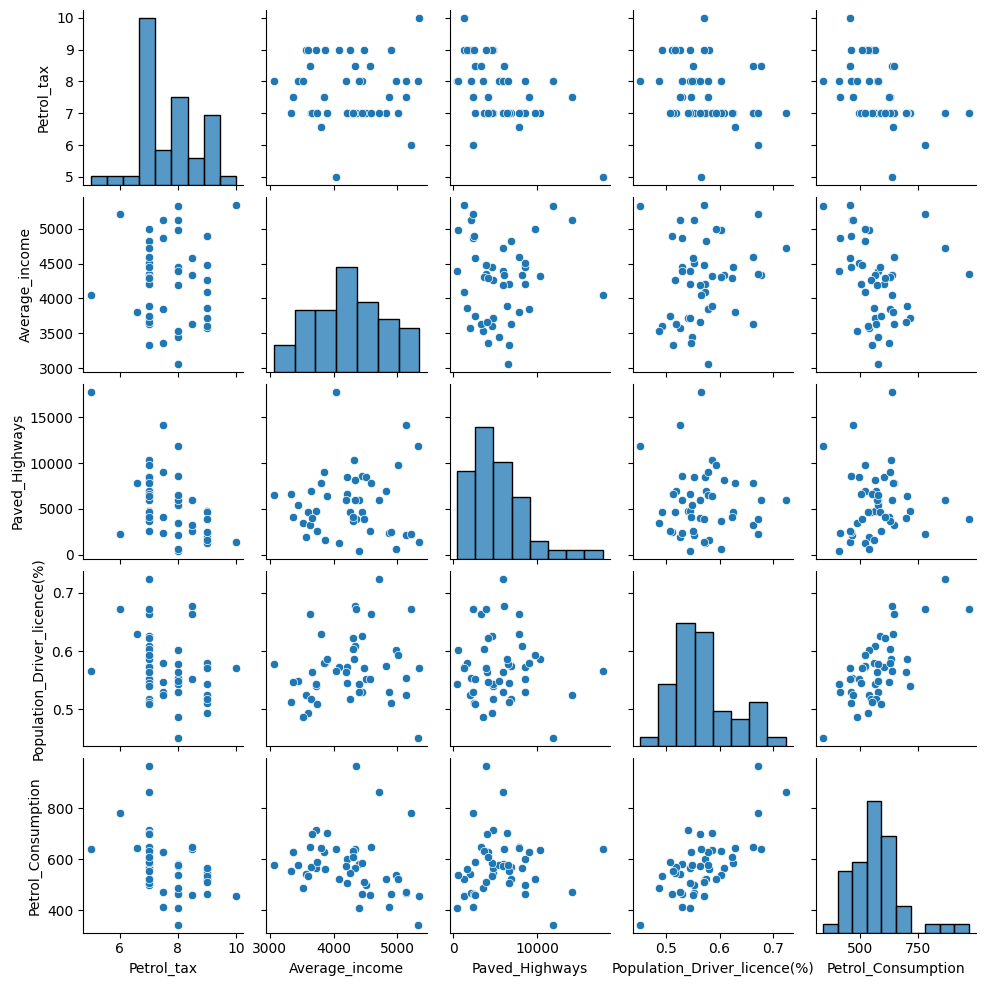

In [151]:
import seaborn as sns


sns.pairplot(data = df, height = 2)


### Create Multiple Linear Regression:

In [152]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = df[
    ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
]

y = df['Petrol_Consumption']
X, y = np.array(X), np.array(y)

regr = LinearRegression()
regr.fit(X, y)


LinearRegression()

### Visualisation Linear Regression:

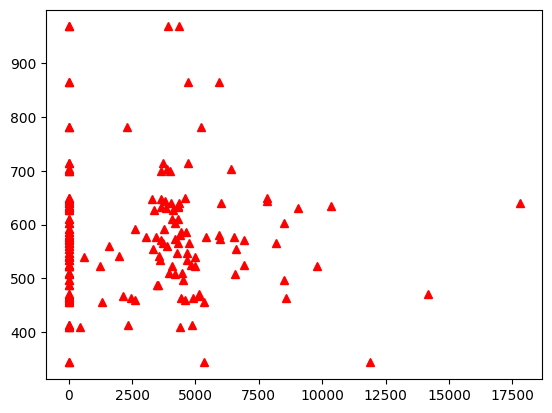

In [153]:
import matplotlib.pyplot as plt


plt.plot(X, y, 'r^')
plt.show()


### Comparison of different values from the dataset:

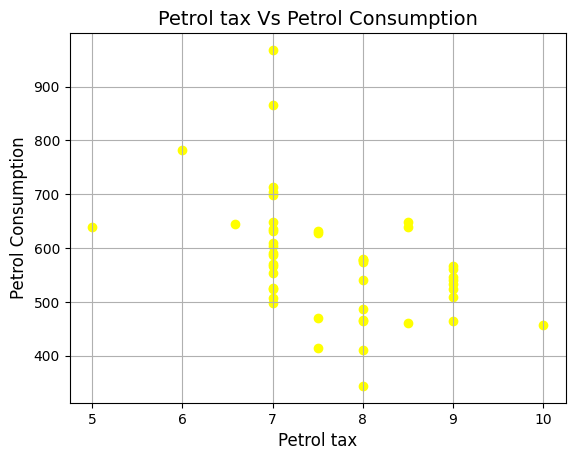

In [154]:
import matplotlib.pyplot as plt


plt.scatter(df['Petrol_tax'], df['Petrol_Consumption'], color='yellow')
plt.title('Petrol tax Vs Petrol Consumption', fontsize=14)
plt.xlabel('Petrol tax', fontsize=12)
plt.ylabel('Petrol Consumption', fontsize=12)
plt.grid(True)
plt.show()


In [155]:
# Predict the Petrol Consumption of a car where the Petrol_tax is 10, Average_income is 3000, Paved_Highways is 1500, Population_Driver_licence(%) is 0.425.

predicted_Petrol_Consumption = regr.predict(([[10, 3000, 1500, 0.425]]))
print('Predicted Petrol Consumption', predicted_Petrol_Consumption)

print('The coefficient values of the regression object: ', regr.coef_)


Predicted Petrol Consumption [393.97554298]
The coefficient values of the regression object:  [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]


### Regression's quality assessment:

In [156]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


X = df[
    ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
]

y = df['Petrol_Consumption']

regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 377.29114647367317
Coefficients: 
 [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]
                            OLS Regression Results                            
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           3.91e-10
Time:                        22:58:37   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]